In [1]:
# Import python Libraries to be used for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load 2024 JCE results dataset (Internals)
results = pd.read_csv(r"C:\Users\j\Documents\Data Analytics Projects\Support_Battalion_JCE_2024_results\Results_jce.csv")

# Display the first 5 rows of the dataset
results.head()

,EXAMINATION NO.,Unnamed: 1,SEX,P/D,NAME (SURNAME FIRST),Unnamed: 5,Unnamed: 6,AGR,BIO,Unnamed: 9,...,ENG,Unnamed: 14,GEO,HIS,MAT,PHY,SOC,WOO,RESULT,Unnamed: 22
0,J0734/001,NaN,F,0,BANDA EMILY,NaN,NaN,D,D,NaN,...,D,NaN,C,F,D,D,D,NaN,PASS,NaN
1,J0734/002,NaN,F,0,BENARD TEREZA,NaN,NaN,C,D,NaN,...,D,NaN,C,D,C,D,D,NaN,PASS,NaN
2,J0734/003,NaN,F,0,BROWN GEORGINA ALICE,NaN,NaN,C,D,NaN,...,C,NaN,C,D,D,D,C,NaN,PASS,NaN
3,J0734/004,NaN,F,0,CHIKOLA CHISOMO,NaN,NaN,C,D,NaN,...,B,NaN,B,C,C,C,D,NaN,PASS,NaN
4,J0734/005,NaN,F,0,CHILEMBA MERVIS,NaN,NaN,C,D,NaN,...,D,NaN,C,D,D,D,D,NaN,PASS,NaN


In [3]:
# Display column names
results.columns

Index(['EXAMINATION NO.', 'Unnamed: 1', 'SEX', 'P/D', 'NAME (SURNAME FIRST)',
       'Unnamed: 5', 'Unnamed: 6', 'AGR', 'BIO', 'Unnamed: 9', 'BKN', 'CHE',
       'CHI', 'ENG', 'Unnamed: 14', 'GEO', 'HIS', 'MAT', 'PHY', 'SOC', 'WOO',
       'RESULT', 'Unnamed: 22'],
      dtype='object')

In [4]:
# Drop unncessary columns
results.drop(['Unnamed: 1', 'P/D', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 9', \
              'Unnamed: 14', 'WOO', 'Unnamed: 22'], axis = 1, inplace = True)

# Clean the name column from "NAME (SURNAME FIRST)" to "NAME"
results.rename(columns = {"NAME (SURNAME FIRST)": "NAME"}, inplace = True)

# Set Name column as Index
results.set_index('NAME', inplace = True)
# Display data information
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, BANDA EMILY to WALUZA MACSENSIOR DESMOND
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EXAMINATION NO.  64 non-null     object
 1   SEX              64 non-null     object
 2   AGR              64 non-null     object
 3   BIO              64 non-null     object
 4   BKN              64 non-null     object
 5   CHE              64 non-null     object
 6   CHI              64 non-null     object
 7   ENG              64 non-null     object
 8   GEO              64 non-null     object
 9   HIS              64 non-null     object
 10  MAT              64 non-null     object
 11  PHY              63 non-null     object
 12  SOC              64 non-null     object
 13  RESULT           64 non-null     object
dtypes: object(14)
memory usage: 7.5+ KB


In [5]:
# Identify candidates that were absent for the exams
absentees = results[results['ENG'] == 'AB']
# Display the records of Absentees
absentees

,EXAMINATION NO.,SEX,AGR,BIO,BKN,CHE,CHI,ENG,GEO,HIS,MAT,PHY,SOC,RESULT
NAME,,,,,,,,,,,,,,
JAMALI JOSOPHINE,J0734/012,F,AB,AB,AB,D,AB,AB,AB,AB,AB,AB,AB,FAIL
TSANZO MPHATSO EDINAH,J0734/039,F,AB,AB,AB,D,AB,AB,AB,AB,AB,AB,AB,FAIL


In [6]:
# Drop records for Absentees
results.drop(['JAMALI JOSOPHINE', 'TSANZO MPHATSO EDINAH'], inplace = True)

# Display the number of remaining records and columns (After we drop unnecessary columns and rows for Absentees)
results.shape

(62, 14)

In [7]:
# Display the top ten performing students
top_ten = results.sort_values(by = ['AGR', 'BIO', 'BKN', 'CHE', 'CHI', 'ENG', 'GEO', 'HIS', 'MAT', 'SOC'])[:10]
top_ten

,EXAMINATION NO.,SEX,AGR,BIO,BKN,CHE,CHI,ENG,GEO,HIS,MAT,PHY,SOC,RESULT
NAME,,,,,,,,,,,,,,
KACHINGWE BRIGHT PRINCE,J0734/053,M,A,B,A,B,B,B,B,B,A,B,D,PASS
WALUZA MACSENSIOR DESMOND,J0734/064,M,B,B,A,B,B,C,A,C,B,B,C,PASS
KAMBAUWA MERCY PHIRI,J0734/016,F,B,C,A,C,C,B,C,D,B,C,D,PASS
DZUUNDE OLIVE DIVEA,J0734/009,F,B,C,C,C,B,C,C,C,B,D,D,PASS
JAMALI CALEB,J0734/051,M,B,C,C,D,C,C,B,B,C,D,C,PASS
NAMAN JOSIAH JOSHUA,J0734/061,M,B,C,D,C,C,D,B,C,D,D,D,PASS
GOMIWA MARY SERINA,J0734/010,F,C,C,A,C,B,B,A,C,B,C,D,PASS
NKHOMA SELLA,J0734/033,F,C,C,A,C,B,C,B,C,C,C,D,PASS
KACHINGWE LONELY CHISOMO,J0734/015,F,C,C,A,C,B,C,C,C,B,C,C,PASS


In [8]:
# Agriculture Frequency Table
agri_frequency = results['AGR'].value_counts()
agri_freq = agri_frequency.reset_index().sort_values('index', ignore_index = True)
agri_freq.rename(columns = {'index': 'Grade', 'AGR': 'Agr_frequency'}, inplace = True)
agri_freq

,Grade,Agr_frequency
0,A,1
1,B,5
2,C,26
3,D,28
4,F,2


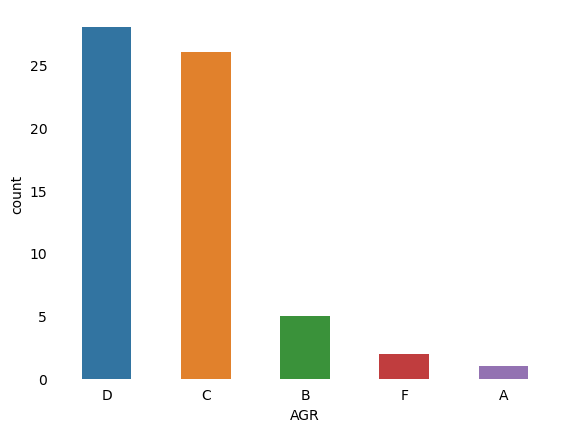

In [9]:
#Agriculture bar chart
sns.countplot(data = results, x = 'AGR', width = 0.5)
sns.despine(left = True, bottom = True)
plt.tick_params(left = False, bottom = False)
plt.show()

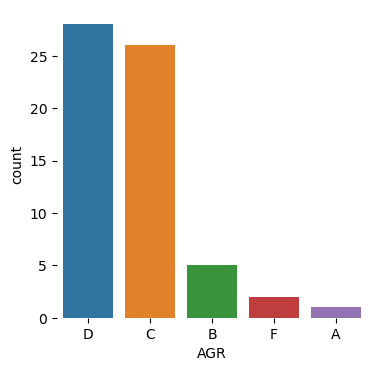

In [10]:
plt.figure(figsize = (4,4))
sns.countplot(data = results, x = 'AGR')
sns.despine(left = True, bottom = True)
plt.show()

In [11]:
# Biology Frequency Table
bio_frequency = results['BIO'].value_counts()
bio_freq = bio_frequency.reset_index().sort_values('index', ignore_index = True)
bio_freq.rename(columns = {'index': 'Grade', 'BIO': 'Bio_frequency'}, inplace = True)
bio_freq

,Grade,Bio_frequency
0,B,2
1,C,14
2,D,34
3,F,12


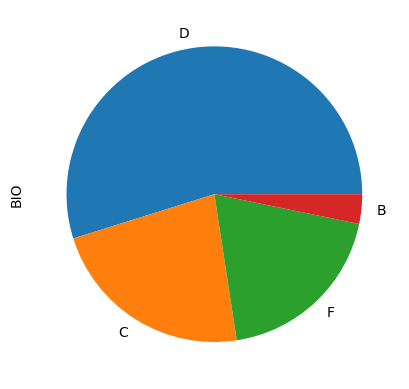

In [12]:
# Biology Pie Chat
bio_frequency.plot(kind = 'pie')
plt.show()

In [13]:
# Bible Knowledge Frequency Table
bkn_frequency = results['BKN'].value_counts()
bkn_freq = bkn_frequency.reset_index().sort_values('index', ignore_index = True)
bkn_freq.rename(columns = {'index': 'Grade', 'BKN': 'BKN_frequency'}, inplace = True)
bkn_freq

,Grade,BKN_frequency
0,A,9
1,B,4
2,C,13
3,D,28
4,F,8


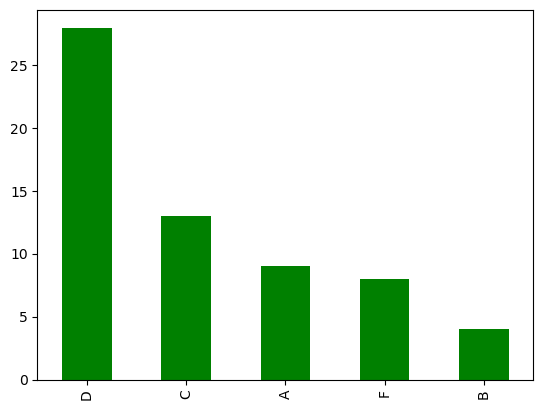

In [14]:
# Bible Knowledge Bar Chart
bkn_frequency.plot(kind = 'bar', color = 'green')
plt.show()

In [15]:
# Chemistry Frequency Table
che_frequency = results['CHE'].value_counts()
che_freq = che_frequency.reset_index().sort_values('index', ignore_index = True)
che_freq.rename(columns = {'index': 'Grade', 'CHE': 'CHE_frequency'},inplace = True)
che_freq

,Grade,CHE_frequency
0,B,2
1,C,14
2,D,39
3,F,7


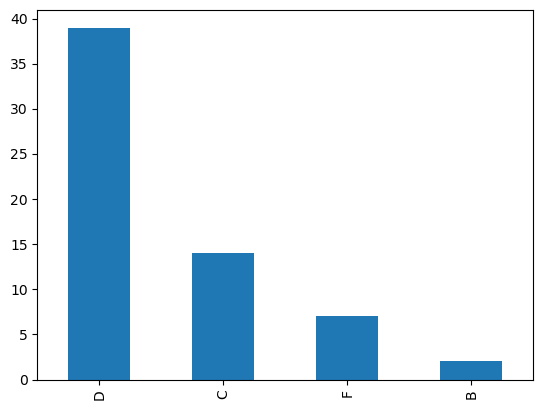

In [16]:
# Chemistry Bar Chart
che_frequency.plot(kind = 'bar')
plt.show()

In [17]:
# Chichewa Frequency Table
chi_frequency = results['CHI'].value_counts()
chi_freq = chi_frequency.reset_index().sort_values('index', ignore_index = True)
chi_freq.rename(columns = {'index': 'Grade', 'CHI': 'CHI_frequency'}, inplace = True)
chi_freq

,Grade,CHI_frequency
0,B,19
1,C,40
2,D,3


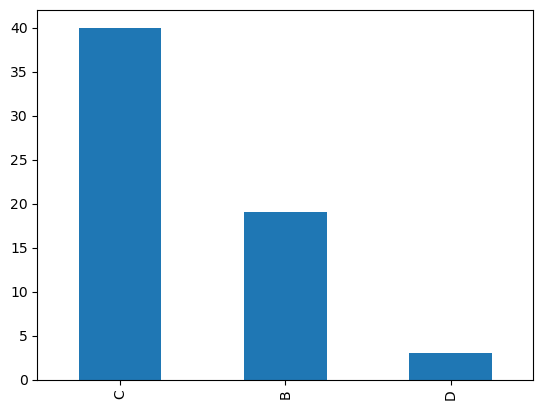

In [18]:
# Chichewa Bar Chart
chi_frequency.plot(kind = 'bar')
plt.show()

In [19]:
# English Frequency Table
eng_frequency = results['ENG'].value_counts()
eng_freq = eng_frequency.reset_index().sort_values('index', ignore_index = True)
eng_freq.rename(columns = {'index': 'Grade', 'ENG': 'ENG_frequency'}, inplace = True)
eng_freq

,Grade,ENG_frequency
0,B,5
1,C,24
2,D,33


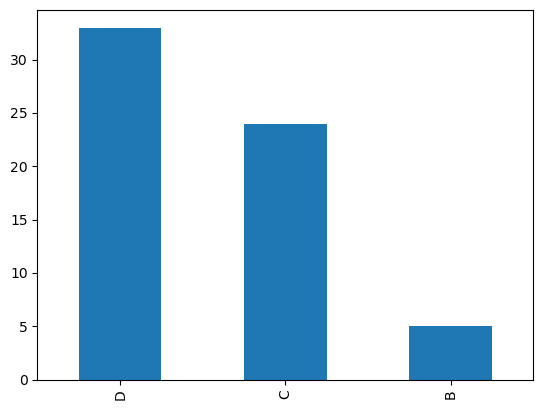

In [20]:
# English Bar Chart
eng_frequency.plot(kind = 'bar')
plt.show()

In [21]:
# Geography Frequency Table
geo_frequency = results['GEO'].value_counts()
geo_freq = geo_frequency.reset_index().sort_values('index', ignore_index = True)
geo_freq.rename(columns = {'index': 'Grade', 'GEO': 'GEO_frequency'}, inplace = True)
geo_freq

,Grade,GEO_frequency
0,A,2
1,B,11
2,C,37
3,D,12


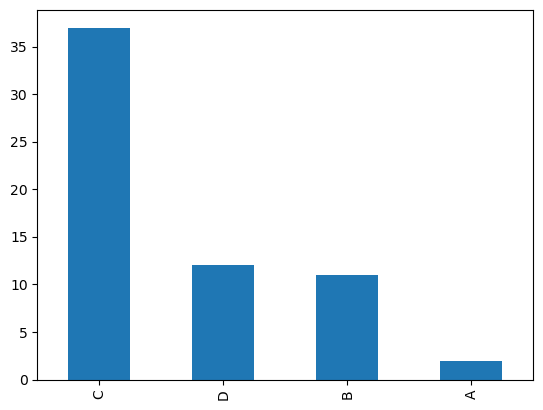

In [22]:
# Geography Bar Chart
geo_frequency.plot(kind = 'bar')
plt.show()

In [23]:
# History Frequency table
his_frequency = results['HIS'].value_counts()
his_freq = his_frequency.reset_index().sort_values('index', ignore_index = True)
his_freq.rename(columns = {'index': 'Grade', 'HIS': 'HIS_frequency'}, inplace = True)
his_freq

,Grade,HIS_frequency
0,B,2
1,C,11
2,D,37
3,F,12


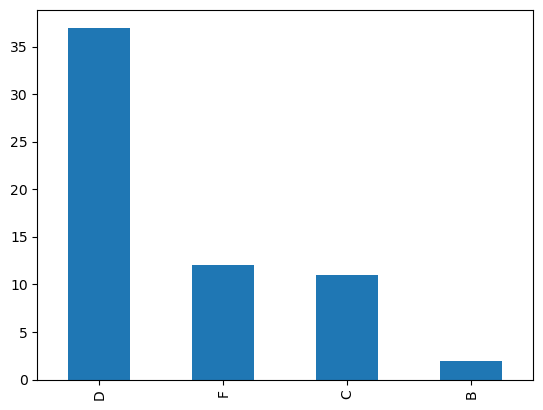

In [24]:
# History Bar Chart
his_frequency.plot(kind = 'bar')
plt.show()

In [25]:
# Mathematics Frequency Table
mat_frequency = results['MAT'].value_counts()
mat_freq = mat_frequency.reset_index().sort_values('index', ignore_index = True)
mat_freq.rename(columns = {'index': 'Grade', 'MAT': 'MAT_frequency'}, inplace = True)
mat_freq

,Grade,MAT_frequency
0,A,1
1,B,9
2,C,15
3,D,27
4,F,10


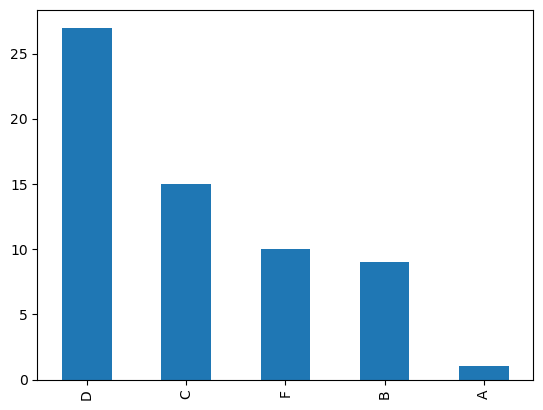

In [26]:
# Mathematics Bar Chart
mat_frequency.plot(kind = 'bar')
plt.show()

In [27]:
# Physics Frequency Table
phy_frequency = results['PHY'].value_counts()
phy_freq = phy_frequency.reset_index().sort_values('index', ignore_index = True)
phy_freq.rename(columns = {'index': 'Grade', 'PHY': 'PHY_frequency'}, inplace = True)
phy_freq

,Grade,PHY_frequency
0,B,3
1,C,5
2,D,39
3,F,14


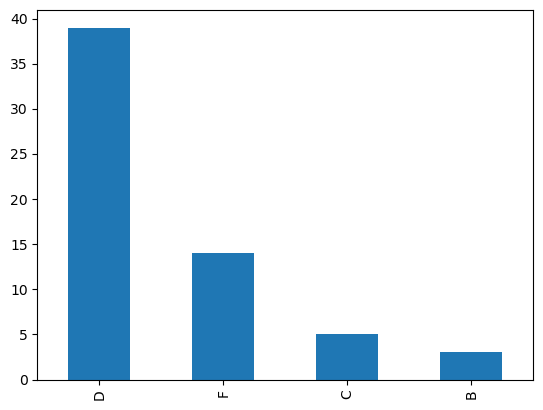

In [28]:
# Physics Bar Chart
phy_frequency.plot(kind = 'bar')
plt.show()

In [29]:
# Social and Life Skills Frequency Table
soc_frequency = results['SOC'].value_counts()
soc_freq = soc_frequency.reset_index().sort_values('index', ignore_index = True)
soc_freq.rename(columns = {'index': 'Grade', 'SOC': 'SOC_frequency'}, inplace = True)
soc_freq

,Grade,SOC_frequency
0,C,7
1,D,44
2,F,11


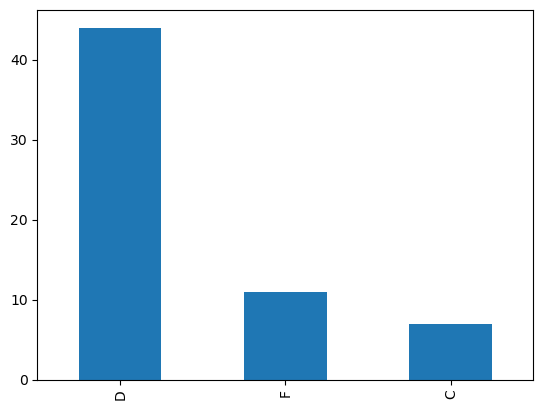

In [30]:
# Social and Life Skills Bar Chart
soc_frequency.plot(kind = 'bar')
plt.show()

In [31]:
agri_freq

,Grade,Agr_frequency
0,A,1
1,B,5
2,C,26
3,D,28
4,F,2


In [32]:
mat_freq

,Grade,MAT_frequency
0,A,1
1,B,9
2,C,15
3,D,27
4,F,10


In [33]:
merged = pd.merge(mat_freq, chi_freq, left_on = 'Grade', right_on= 'Grade', how = 'left')
merged

,Grade,MAT_frequency,CHI_frequency
0,A,1,NaN
1,B,9,19.0
2,C,15,40.0
3,D,27,3.0
4,F,10,NaN


In [34]:
merged = pd.merge(merged, agri_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
merged

,Grade,MAT_frequency,CHI_frequency,Agr_frequency
0,A,1,NaN,1
1,B,9,19.0,5
2,C,15,40.0,26
3,D,27,3.0,28
4,F,10,NaN,2


In [35]:
merged = pd.merge(merged, soc_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
merged = pd.merge(merged, phy_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
merged = pd.merge(merged, geo_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
merged = pd.merge(merged, his_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
merged = pd.merge(merged, che_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
merged = pd.merge(merged, eng_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
merged = pd.merge(merged, bkn_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
grade_freq = pd.merge(merged, bio_freq, left_on = 'Grade', right_on = 'Grade', how = 'left')
grade_freq

,Grade,MAT_frequency,CHI_frequency,Agr_frequency,SOC_frequency,PHY_frequency,GEO_frequency,HIS_frequency,CHE_frequency,ENG_frequency,BKN_frequency,Bio_frequency
0,A,1,NaN,1,NaN,NaN,2.0,NaN,NaN,NaN,9,NaN
1,B,9,19.0,5,NaN,3.0,11.0,2.0,2.0,5.0,4,2.0
2,C,15,40.0,26,7.0,5.0,37.0,11.0,14.0,24.0,13,14.0
3,D,27,3.0,28,44.0,39.0,12.0,37.0,39.0,33.0,28,34.0
4,F,10,NaN,2,11.0,14.0,NaN,12.0,7.0,NaN,8,12.0


In [36]:
grade_freq.shape

(5, 12)

In [37]:
grade_freq.columns = ['Grade', 'MATHEMATICS', 'CHICHEWA', 'AGRICULTURE',
       'SOCIAL STUDIES', 'PHYSICS', 'GEOGRAPHY', 'HISTORY',
       'CHEMISTRY', 'ENGLISH', 'BIBLE KNOWLEDGE', 'BIOLOGY']
grade_freq.fillna(0, inplace = True)
grade_freq.set_index('Grade', inplace = True )
grade_freq

,MATHEMATICS,CHICHEWA,AGRICULTURE,SOCIAL STUDIES,PHYSICS,GEOGRAPHY,HISTORY,CHEMISTRY,ENGLISH,BIBLE KNOWLEDGE,BIOLOGY
Grade,,,,,,,,,,,
A,1,0.0,1,0.0,0.0,2.0,0.0,0.0,0.0,9,0.0
B,9,19.0,5,0.0,3.0,11.0,2.0,2.0,5.0,4,2.0
C,15,40.0,26,7.0,5.0,37.0,11.0,14.0,24.0,13,14.0
D,27,3.0,28,44.0,39.0,12.0,37.0,39.0,33.0,28,34.0
F,10,0.0,2,11.0,14.0,0.0,12.0,7.0,0.0,8,12.0


In [38]:
grade_freq = grade_freq.transpose()
grade_freq.index.name = None
grade_freq

Grade,A,B,C,D,F
MATHEMATICS,1.0,9.0,15.0,27.0,10.0
CHICHEWA,0.0,19.0,40.0,3.0,0.0
AGRICULTURE,1.0,5.0,26.0,28.0,2.0
SOCIAL STUDIES,0.0,0.0,7.0,44.0,11.0
PHYSICS,0.0,3.0,5.0,39.0,14.0
GEOGRAPHY,2.0,11.0,37.0,12.0,0.0
HISTORY,0.0,2.0,11.0,37.0,12.0
CHEMISTRY,0.0,2.0,14.0,39.0,7.0
ENGLISH,0.0,5.0,24.0,33.0,0.0
BIBLE KNOWLEDGE,9.0,4.0,13.0,28.0,8.0


In [39]:
grade_freq['A'] = grade_freq['A'].astype('int')
grade_freq['B'] = grade_freq['B'].astype('int')
grade_freq['C'] = grade_freq['C'].astype('int')
grade_freq['D'] = grade_freq['D'].astype('int')
grade_freq['F'] = grade_freq['F'].astype('int')
grade_freq

Grade,A,B,C,D,F
MATHEMATICS,1,9,15,27,10
CHICHEWA,0,19,40,3,0
AGRICULTURE,1,5,26,28,2
SOCIAL STUDIES,0,0,7,44,11
PHYSICS,0,3,5,39,14
GEOGRAPHY,2,11,37,12,0
HISTORY,0,2,11,37,12
CHEMISTRY,0,2,14,39,7
ENGLISH,0,5,24,33,0
BIBLE KNOWLEDGE,9,4,13,28,8


In [40]:
results.head()

,EXAMINATION NO.,SEX,AGR,BIO,BKN,CHE,CHI,ENG,GEO,HIS,MAT,PHY,SOC,RESULT
NAME,,,,,,,,,,,,,,
BANDA EMILY,J0734/001,F,D,D,D,D,C,D,C,F,D,D,D,PASS
BENARD TEREZA,J0734/002,F,C,D,D,C,C,D,C,D,C,D,D,PASS
BROWN GEORGINA ALICE,J0734/003,F,C,D,D,D,B,C,C,D,D,D,C,PASS
CHIKOLA CHISOMO,J0734/004,F,C,D,A,C,C,B,B,C,C,C,D,PASS
CHILEMBA MERVIS,J0734/005,F,C,D,D,D,C,D,C,D,D,D,D,PASS


In [41]:
female_candidates = results[results['SEX'] == 'F']
female_candidates.shape

(40, 14)

In [42]:
male_candidates = results[results['SEX'] == 'M']
male_candidates.shape

(22, 14)

In [43]:
female_candidates_passed_agri = female_candidates[female_candidates['AGR'] != 'F']

female_candidates_failed_agri = female_candidates[female_candidates['AGR'] == 'F']

male_candidates_passed_agri = male_candidates[male_candidates['AGR'] != 'F']

male_candidates_failed_agri = male_candidates[male_candidates['AGR'] == 'F']

print("The number of female candidates that passed Agriculture: {0}.".format(female_candidates_passed_agri.shape[0]))
print("The number of female candidates that failed Agriculture: {0}.".format(female_candidates_failed_agri.shape[0]))
print("The number of male candidates that passed Agriculture: {0}.".format(male_candidates_passed_agri.shape[0]))
print("The number of male candidates that failed Agriculture: {0}.".format(male_candidates_failed_agri.shape[0]))

The number of female candidates that passed Agriculture: 39.
The number of female candidates that failed Agriculture: 1.
The number of male candidates that passed Agriculture: 21.
The number of male candidates that failed Agriculture: 1.


In [44]:
female_candidates_passed_bio = female_candidates[female_candidates['BIO'] != 'F']
female_candidates_failed_bio = female_candidates[female_candidates['BIO'] == 'F']
male_candidates_passed_bio = male_candidates[male_candidates['BIO'] != 'F']
male_candidates_failed_bio = male_candidates[male_candidates['BIO'] == 'F']

print("The number of female candidates that passed Biology: {0}.".format(female_candidates_passed_bio.shape[0]))
print("The number of female candidates that failed Biology: {0}.".format(female_candidates_failed_bio.shape[0]))
print("The number of male candidates that passed Biology: {0}.".format(male_candidates_passed_bio.shape[0]))
print("The number of male candidates failed Biology: {0}".format(male_candidates_failed_bio.shape[0]))

The number of female candidates that passed Biology: 32.
The number of female candidates that failed Biology: 8.
The number of male candidates that passed Biology: 18.
The number of male candidates failed Biology: 4


In [45]:
female_candidates_passed_che = female_candidates[female_candidates['CHE'] != 'F']
female_candidates_failed_che = female_candidates[female_candidates['CHE'] == 'F']
male_candidates_passed_che = male_candidates[male_candidates['CHE'] != 'F']
male_candidates_failed_che = male_candidates[male_candidates['CHE'] == 'F']

print("The number of female candidates that passed Chemeistry: {0}.".format(female_candidates_passed_che.shape[0]))
print("The number of female candidates that failed Chemistry: {0}.".format(female_candidates_failed_che.shape[0]))
print("The number of male candidates that passed Chemistry: {0}.".format(male_candidates_passed_che.shape[0]))
print("The number of male candidates failed Chemistry: {0}".format(male_candidates_failed_che.shape[0]))

The number of female candidates that passed Chemeistry: 36.
The number of female candidates that failed Chemistry: 4.
The number of male candidates that passed Chemistry: 19.
The number of male candidates failed Chemistry: 3


In [46]:
female_candidates_passed_chi = female_candidates[female_candidates['CHI'] != 'F']
female_candidates_failed_chi = female_candidates[female_candidates['CHI'] == 'F']
male_candidates_passed_chi = male_candidates[male_candidates['CHI'] != 'F']
male_candidates_failed_chi = male_candidates[male_candidates['CHI'] == 'F']

print("The number of female candidates that passed Chichewa: {0}.".format(female_candidates_passed_chi.shape[0]))
print("The number of female candidates that failed Chichewa: {0}.".format(female_candidates_failed_chi.shape[0]))
print("The number of male candidates that passed Chichewa: {0}.".format(male_candidates_passed_chi.shape[0]))
print("The number of male candidates failed Chichewa: {0}".format(male_candidates_failed_chi.shape[0]))

The number of female candidates that passed Chichewa: 40.
The number of female candidates that failed Chichewa: 0.
The number of male candidates that passed Chichewa: 22.
The number of male candidates failed Chichewa: 0


In [47]:
female_candidates_passed_mat = female_candidates[female_candidates['MAT'] != 'F']
female_candidates_failed_mat = female_candidates[female_candidates['MAT'] == 'F']
male_candidates_passed_mat = male_candidates[male_candidates['MAT'] != 'F']
male_candidates_failed_mat = male_candidates[male_candidates['MAT'] == 'F']

print("The number of female candidates that passed Mathematics: {0}.".format(female_candidates_passed_mat.shape[0]))
print("The number of female candidates that failed Mathematics: {0}.".format(female_candidates_failed_mat.shape[0]))
print("The number of male candidates that passed Mathematics: {0}.".format(male_candidates_passed_mat.shape[0]))
print("The number of male candidates failed Mathematics: {0}".format(male_candidates_failed_mat.shape[0]))

The number of female candidates that passed Mathematics: 31.
The number of female candidates that failed Mathematics: 9.
The number of male candidates that passed Mathematics: 21.
The number of male candidates failed Mathematics: 1


In [48]:
female_candidates_passed_phy = female_candidates[female_candidates['PHY'] != 'F']
female_candidates_failed_phy = female_candidates[female_candidates['PHY'] == 'F']
male_candidates_passed_phy = male_candidates[male_candidates['PHY'] != 'F']
male_candidates_failed_phy = male_candidates[male_candidates['PHY'] == 'F']

print("The number of female candidates that passed Physics: {0}.".format(female_candidates_passed_phy.shape[0]))
print("The number of female candidates that failed Physics: {0}.".format(female_candidates_failed_phy.shape[0]))
print("The number of male candidates that passed Physics: {0}.".format(male_candidates_passed_phy.shape[0]))
print("The number of male candidates failed Physics: {0}".format(male_candidates_failed_phy.shape[0]))

The number of female candidates that passed Physics: 28.
The number of female candidates that failed Physics: 12.
The number of male candidates that passed Physics: 20.
The number of male candidates failed Physics: 2


In [49]:
female_candidates_passed_soc = female_candidates[female_candidates['SOC'] != 'F']
female_candidates_failed_soc = female_candidates[female_candidates['SOC'] == 'F']
male_candidates_passed_soc = male_candidates[male_candidates['SOC'] != 'F']
male_candidates_failed_soc = male_candidates[male_candidates['SOC'] == 'F']

print("The number of female candidates that passed Social Studies: {0}.".format(female_candidates_passed_soc.shape[0]))
print("The number of female candidates that failed Social Studies: {0}.".format(female_candidates_failed_soc.shape[0]))
print("The number of male candidates that passed Social Studies: {0}.".format(male_candidates_passed_soc.shape[0]))
print("The number of male candidates failed Social Studies: {0}".format(male_candidates_failed_soc.shape[0]))

The number of female candidates that passed Social Studies: 33.
The number of female candidates that failed Social Studies: 7.
The number of male candidates that passed Social Studies: 18.
The number of male candidates failed Social Studies: 4


In [50]:
female_candidates_passed_bkn = female_candidates[female_candidates['BKN'] != 'F']
female_candidates_failed_bkn = female_candidates[female_candidates['BKN'] == 'F']
male_candidates_passed_bkn = male_candidates[male_candidates['BKN'] != 'F']
male_candidates_failed_bkn = male_candidates[male_candidates['BKN'] == 'F']

print("The number of female candidates that passed Bible Knowlwdge: {0}.".format(female_candidates_passed_bkn.shape[0]))
print("The number of female candidates that failed Bible Knowledge: {0}.".format(female_candidates_failed_bkn.shape[0]))
print("The number of male candidates that passed Bible Knowledge: {0}.".format(male_candidates_passed_bkn.shape[0]))
print("The number of male candidates failed Bible Knowledge: {0}".format(male_candidates_failed_bkn.shape[0]))

The number of female candidates that passed Bible Knowlwdge: 36.
The number of female candidates that failed Bible Knowledge: 4.
The number of male candidates that passed Bible Knowledge: 18.
The number of male candidates failed Bible Knowledge: 4


In [51]:
female_candidates_passed_geo = female_candidates[female_candidates['GEO'] != 'F']
female_candidates_failed_geo = female_candidates[female_candidates['GEO'] == 'F']
male_candidates_passed_geo = male_candidates[male_candidates['GEO'] != 'F']
male_candidates_failed_geo = male_candidates[male_candidates['GEO'] == 'F']

print("The number of female candidates that passed Geography: {0}.".format(female_candidates_passed_geo.shape[0]))
print("The number of female candidates that failed Geography: {0}.".format(female_candidates_failed_geo.shape[0]))
print("The number of male candidates that passed Geograpghy: {0}.".format(male_candidates_passed_geo.shape[0]))
print("The number of male candidates failed Geography: {0}".format(male_candidates_failed_geo.shape[0]))

The number of female candidates that passed Geography: 40.
The number of female candidates that failed Geography: 0.
The number of male candidates that passed Geograpghy: 22.
The number of male candidates failed Geography: 0


In [52]:
female_candidates_passed_his = female_candidates[female_candidates['HIS'] != 'F']
female_candidates_failed_his = female_candidates[female_candidates['HIS'] == 'F']
male_candidates_passed_his = male_candidates[male_candidates['HIS'] != 'F']
male_candidates_failed_his = male_candidates[male_candidates['HIS'] == 'F']

print("The number of female candidates that passed History: {0}.".format(female_candidates_passed_his.shape[0]))
print("The number of female candidates that failed History: {0}.".format(female_candidates_failed_his.shape[0]))
print("The number of male candidates that passed History: {0}.".format(male_candidates_passed_his.shape[0]))
print("The number of male candidates failed History: {0}".format(male_candidates_failed_his.shape[0]))

The number of female candidates that passed History: 30.
The number of female candidates that failed History: 10.
The number of male candidates that passed History: 20.
The number of male candidates failed History: 2


In [53]:
female_candidates_passed_eng = female_candidates[female_candidates['ENG'] != 'F']
female_candidates_failed_eng = female_candidates[female_candidates['ENG'] == 'F']
male_candidates_passed_eng = male_candidates[male_candidates['ENG'] != 'F']
male_candidates_failed_eng = male_candidates[male_candidates['ENG'] == 'F']

print("The number of female candidates that passed English: {0}.".format(female_candidates_passed_eng.shape[0]))
print("The number of female candidates that failed English: {0}.".format(female_candidates_failed_eng.shape[0]))
print("The number of male candidates that passed English: {0}.".format(male_candidates_passed_eng.shape[0]))
print("The number of male candidates failed English: {0}".format(male_candidates_failed_eng.shape[0]))

The number of female candidates that passed English: 40.
The number of female candidates that failed English: 0.
The number of male candidates that passed English: 22.
The number of male candidates failed English: 0


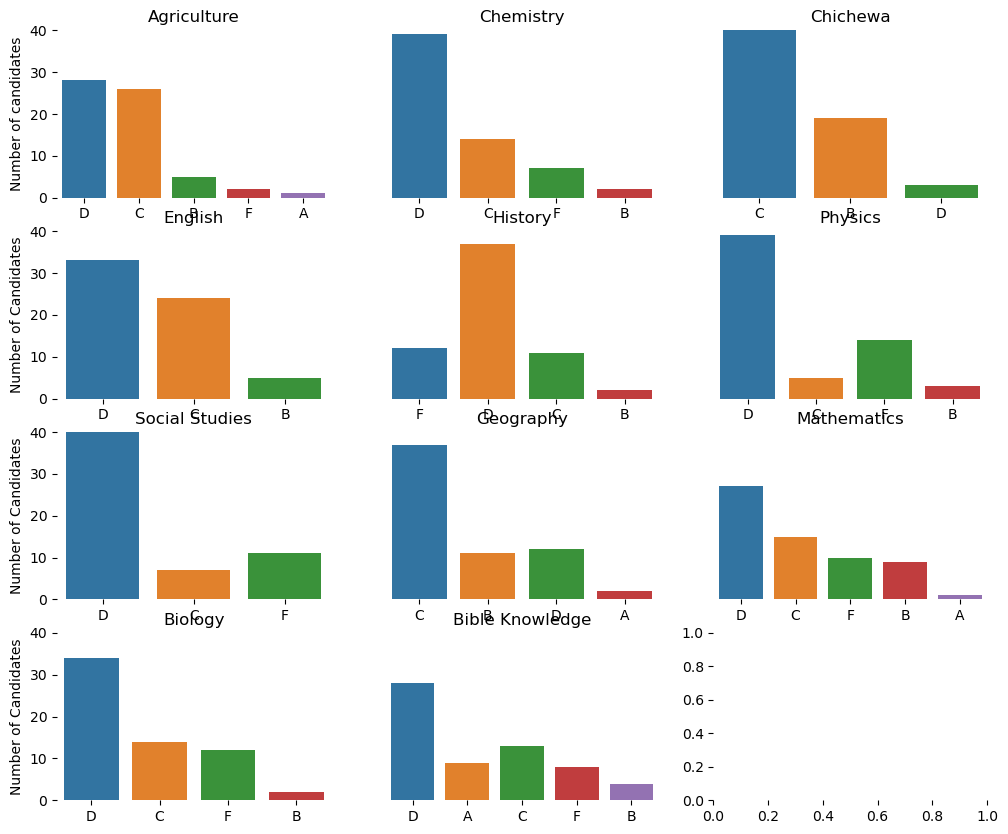

In [54]:
plt.subplots(nrows = 4, ncols = 3, figsize = (12, 10))
plt.subplot(4, 3, 1)
sns.countplot(data = results, x = 'AGR')
sns.despine(left = True, bottom = True)
plt.ylim(0, 40)
plt.yticks([0, 10, 20, 30, 40])
plt.ylabel('Number of candidates')
plt.xlabel('')
plt.title('Agriculture')

plt.subplot(4, 3, 2)
sns.countplot(data = results, x = 'CHE')
plt.ylim(0, 40)
plt.xlabel('')
plt.yticks([])
plt.ylabel('')
plt.title('Chemistry')

plt.subplot(4, 3, 3)
sns.countplot(data = results, x = 'CHI')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.title('Chichewa')

plt.subplot(4, 3, 4)
sns.countplot(data = results, x = 'ENG')
plt.ylim(0, 40)
plt.yticks([0, 10, 20, 30, 40])
plt.ylabel('Number of Candidates')
plt.xlabel('')
plt.title('English')

plt.subplot(4, 3, 5)
sns.countplot(data = results, x = 'HIS')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.title('History')

plt.subplot(4, 3, 6)
sns.countplot(data = results, x = 'PHY')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.title('Physics')

plt.subplot(4, 3, 7)
sns.countplot(data = results, x = 'SOC')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('Number of Candidates')
plt.title('Social Studies')

plt.subplot(4, 3, 8)
sns.countplot(data = results, x = 'GEO')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.title('Geography')

plt.subplot(4, 3, 9)
sns.countplot(data = results, x = 'MAT')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.title('Mathematics')

plt.subplot(4, 3, 10)
sns.countplot(data = results, x = 'BIO')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('Number of Candidates')
plt.yticks([0, 10, 20, 30, 40])
plt.title('Biology')

plt.subplot(4, 3, 11)
sns.countplot(data = results, x = 'BKN')
plt.ylim(0, 40)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.title('Bible Knowledge')

plt.show()

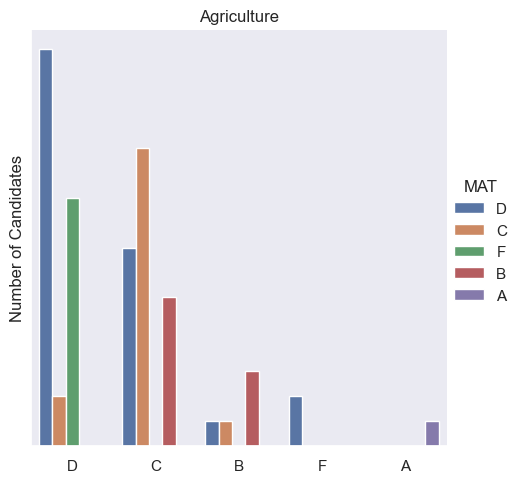

In [55]:
sns.set_theme()
sns.catplot(data = results, x = 'AGR', kind = 'count', hue = 'MAT')
plt.grid(visible = False)
plt.xlabel('')
plt.ylabel('Number of Candidates')
plt.title('Agriculture')
plt.yticks([])
plt.show()